In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

print("Reading data")
print(os.listdir("../NLPStuff"))

##For data preprocessing
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

##For Machine Learning
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
# Any results you write to the current directory are saved as output.

Reading data
['folksonomication_source-master', 'mpst_full_data.csv', '.ipynb_checkpoints', 'CATS-Main.ipynb', 'partition.json', 'GenrePredictor.ipynb', 'MPSTGenreCorrected.csv', 'GenreCorrected.csv', 'wiki_movie_plots_deduped.csv']


In [2]:
df1 = pd.read_csv("../NLPStuff/wiki_movie_plots_deduped.csv")
df1.tail()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
Release Year        34886 non-null int64
Title               34886 non-null object
Origin/Ethnicity    34886 non-null object
Director            34886 non-null object
Cast                33464 non-null object
Genre               34886 non-null object
Wiki Page           34886 non-null object
Plot                34886 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [3]:
df2 = pd.read_csv("../NLPStuff/mpst_full_data.csv")
df2.tail()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 6 columns):
imdb_id            14828 non-null object
title              14828 non-null object
plot_synopsis      14828 non-null object
tags               14828 non-null object
split              14828 non-null object
synopsis_source    14828 non-null object
dtypes: object(6)
memory usage: 695.1+ KB


In [4]:
df1['Genre']=df1['Genre'].replace('unknown',np.nan)
df1=df1.dropna(axis=0, subset=['Genre'])
print(df1.info())
df2['tags']=df2['tags'].replace('unknown',np.nan)
df2=df2.dropna(axis=0, subset=['tags'])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28803 entries, 6 to 34885
Data columns (total 8 columns):
Release Year        28803 non-null int64
Title               28803 non-null object
Origin/Ethnicity    28803 non-null object
Director            28803 non-null object
Cast                28064 non-null object
Genre               28803 non-null object
Wiki Page           28803 non-null object
Plot                28803 non-null object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14828 entries, 0 to 14827
Data columns (total 6 columns):
imdb_id            14828 non-null object
title              14828 non-null object
plot_synopsis      14828 non-null object
tags               14828 non-null object
split              14828 non-null object
synopsis_source    14828 non-null object
dtypes: object(6)
memory usage: 810.9+ KB
None


In [5]:
print(len(df1))
print(df1.shape)
a=df1['Genre'].value_counts()[:500]
b=a.keys().tolist()
print(b)
df1=df1[df1.Genre.isin(b)]
df1=df1.reset_index(drop=True)
print(len(df2))
print(df2.shape)
c=df2['tags'].value_counts()[:2000]
d=c.keys().tolist()
print(d)
df2=df2[df2.tags.isin(d)]
df2=df2.reset_index(drop=True)

28803
(28803, 8)
['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical', 'crime drama', 'romantic comedy', 'science fiction', 'film noir', 'mystery', 'war', 'animation', 'comedy, drama', 'sci-fi', 'family', 'fantasy', 'animated', 'musical comedy', 'comedy-drama', 'biography', 'anime', 'suspense', 'comedy drama', 'romantic drama', 'animated short', 'drama, romance', 'social', 'historical', 'documentary', 'action thriller', 'serial', 'world war ii', 'family drama', 'war drama', 'drama, crime', 'comedy, musical', 'comedy/drama', 'comedy, romance', 'romance, drama', 'biopic', 'crime thriller', 'historical drama', 'black comedy', 'action comedy', 'comedy short', 'superhero', 'crime comedy', 'horror comedy', 'martial arts', 'drama, biography', 'action, drama', 'action, romance', 'drama, war', 'action, thriller', 'romance/comedy', 'social drama', 'melodrama', 'drama, adventure', 'romance/drama', 'action, comedy', 'action drama', 'biography, d

In [6]:
def plotToWords(raw_plot):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_plot)
    lower_case = letters_only.lower()
    words = lower_case.split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))

def preprocess(dataframe):
    clean_train_reviews = []
    for i in range(0,len(dataframe)):
        clean_train_reviews.append(plotToWords(dataframe.iloc[i]['Plot']))
    dataframe['Plot']=clean_train_reviews
    return dataframe
def preprocess2(dataframe):
    clean_train_reviews = []
    for i in range(0,len(dataframe)):
        clean_train_reviews.append(plotToWords(dataframe.iloc[i]['plot_synopsis']))
    dataframe['plot_synopsis']=clean_train_reviews
    return dataframe

df1=preprocess(df1)
print(df1["Plot"][:10])
df2=preprocess2(df2)
print(df2["plot_synopsis"][:10])



0    film opens two bandits breaking railroad teleg...
1    film family move suburbs hoping quiet life thi...
2    rarebit fiend gorges welsh rarebit restaurant ...
3    irish villager kathleen tenant captain clearfi...
4    boone daughter befriends indian maiden boone c...
5    heading baseball game nearby ballpark sports f...
6    plot black woman going dentist toothache given...
7    beautiful summer day father mother take daught...
8    thug accosts girl leaves workplace man rescues...
9    young couple decides elope caught midst romant...
Name: Plot, dtype: object
0    two thousand years ago nhagruul foul sorcerer ...
1    matuschek gift store budapest workplace alfred...
2    may cuban man named tony montana al pacino cla...
3    george falconer colin firth approaches car acc...
4    small time italian american criminals caesar e...
5    movie begins video shot men hands tied behind ...
6    action takes place years sweden troubled year ...
7    somafree institute dr hal raglan h

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), max_features=10000)
features = tfidf.fit_transform(df1.Plot).toarray()
labels = df1.Genre
features.shape

(26825, 10000)

In [8]:
tfidf2 = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), max_features=10000)
features2 = tfidf2.fit_transform(df2.plot_synopsis).toarray()
labels2 = df2.tags
features2.shape

(11224, 10000)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import random
X_train, X_test, y_train, y_test = train_test_split(df1['Plot'], df1['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [10]:
#VERY MEMORY / CPU INTENSIVE
#RUN ONLY ON A GOOD MACHINE!

#X_train2, X_test2, y_train2, y_test2 = train_test_split(df2['plot_synopsis'], df2['tags'], random_state = 0)
#count_vect2 = CountVectorizer()
#X_train_counts2 = count_vect2.fit_transform(X_train2)
#tfidf_transformer2 = TfidfTransformer()
#X_train_tfidf2 = tfidf_transformer2.fit_transform(X_train_counts2)
#clf2 = MultinomialNB().fit(X_train_tfidf2, y_train2)

Can now use model to generate tags for a given description. The code below generates a random element in the MPST dataset for the synopsis and then attempts to find the best tags using the model. It has an intrinsic preference towards "horror" and "sexploitation" movies for some reason (sexploitation appears in the top 3 tags 90%+ of the time) - considering that "sex sells" in Hollywood, this is to be expected from the Wikipedia training dataset.

Top 3 (descending order) predictions for the primary tags are: 
['horror / drama', 'action/drama', 'drama / action']
Best / Actual associated tags: 
['violence, murder']
Title: 
["Badman's Territory"]


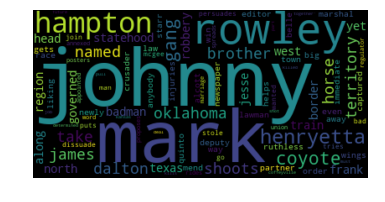

In [11]:
elem = random.randint(0,11223)
test = [df2['plot_synopsis'][elem]]
actual = [df2['tags'][elem]] 
title = [df2['title'][elem]]
print('Top 3 (descending order) predictions for the primary tags are: ')
preds = np.argsort(clf.predict_proba(count_vect.transform(test)),axis=1)[:,-3:]
vals = [b[i] for i in preds.flatten()]
print(vals)
print('Best / Actual associated tags: ')
print(actual)
print('Title: ')
print(title)
import wordcloud
wordc = wordcloud.WordCloud().generate(str(test))
plt.imshow(wordc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
#generate vocabulary / counts for every word in the wikipedia dataset
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = list(map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1])))
    return vocab, vocabcount

In [13]:
vocab, vocabcount = get_vocab(df1['Title']+df1['Plot'])

In [14]:
voclist = vocab
print(voclist[:50])
print('...',len(voclist))

['one', 'back', 'father', 'two', 'tells', 'man', 'home', 'love', 'new', 'later', 'time', 'get', 'house', 'also', 'family', 'police', 'life', 'finds', 'find', 'however', 'mother', 'day', 'goes', 'takes', 'wife', 'go', 'away', 'take', 'help', 'night', 'son', 'money', 'gets', 'tries', 'first', 'friend', 'film', 'killed', 'men', 'death', 'car', 'next', 'daughter', 'young', 'becomes', 'old', 'leave', 'leaves', 'decides', 'another']
... 149995


There are a few words which have a very high frequency (i.e. adverbs and words like "the" in English), so the distribution is very heavily sqewed towards them.
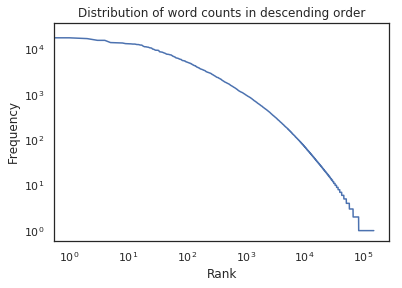

Text(0, 0.5, 'Frequency')

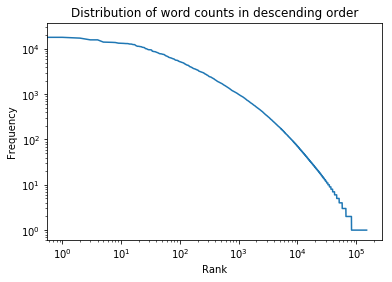

In [15]:
plt.plot([vocabcount[w] for w in voclist])
plt.gca().set_xscale('log',nonposx='clip')
plt.gca().set_yscale('log',nonposy='clip')
plt.title('Distribution of word counts in descending order')
plt.xlabel('Rank')
plt.ylabel('Frequency')

In [17]:
empty = 0
eos = 1
start_idx = eos+1
def get_idx(voc1, voc2):#vocab and vocabcount
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>']=empty
    word2idx['<eos>']=eos
    idx2word = dict((idx,word) for word,idx in word2idx.items())
    return word2idx, idx2word
word2idx, idx2word = get_idx(vocab, vocabcount)

In [20]:
FN = 'vocabulary-embedding'
vocab_size = 40000
embedding_dim = 100
lower = False # dont lower case the text

In [18]:
import keras
import os
import pickle

maxlend=25
maxlenh=25
maxlen = maxlend + maxlenh
rnn_size = 512
rnn_layers = 3
batch_norm = False
activation_rnn_size = 40 if maxlend else 0

seed = 130
p_W, p_U, p_dense, weight_decay = 0,0,0,0
optimizer = 'adam'
LR = 1e-4
batch_size = 64
nflips = 10
nb_train_samples = 30000
nb_val_samples = 3000

Using TensorFlow backend.


The code below will download some pretrained GloVe embedding (~800MB), so make sure you have enough space.

In [25]:
fname = 'glove.6B.%dd.txt'%embedding_dim
import os
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/NLPStuff', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = keras.utils.get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    !unzip {datadir}/{path}

unzip:  cannot find or open /home/albert/.keras/datasets//home/albert/.keras/datasets/glove.6B.zip, /home/albert/.keras/datasets//home/albert/.keras/datasets/glove.6B.zip.zip or /home/albert/.keras/datasets//home/albert/.keras/datasets/glove.6B.zip.ZIP.


In [32]:
glove_n_symbols = ['400000', 'glove.6B.100d.txt']
glove_n_symbols = int(glove_n_symbols[0].split()[0])
glove_n_symbols

400000

In [47]:
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1
with open('/home/albert/Documents/NLPStuff/glove.6B.100d.txt', 'r') as fp:
    i = 0
    for l in fp:
        l = l.strip().split()
        w = l[0]
        glove_index_dict[w] = i
        glove_embedding_weights[i,:] = [float(i) for i in l[1:]]
        i += 1
glove_embedding_weights *= globale_scale

In [48]:
glove_embedding_weights.std()

0.04081572760019029

In [49]:
for w,i in glove_index_dict.items():
    w = w.lower()
    if w not in glove_index_dict:
        glove_index_dict[w] = i

In [50]:
import numpy as np

# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = glove_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
#print 'random-embedding/glove scale', scale, 'std', embedding.std()

# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    w = idx2word[i]
    g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = glove_embedding_weights[g,:]
        c+=1
#print 'number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size)

In [51]:
glove_thr = 0.5

In [52]:
word2glove = {}
for w in word2idx:
    if w in glove_index_dict:
        g = w
    elif w.lower() in glove_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in glove_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in glove_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2glove[w] = g

In [54]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

glove_match = []
for w,idx in word2idx.items():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2glove:
        gidx = glove_index_dict[word2glove[w]]
        gweight = glove_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < glove_thr:
                break
            if idx2word[embedding_idx] in word2glove :
                glove_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
glove_match.sort(key = lambda x: -x[2])
#print '# of glove substitutes found', len(glove_match)

In [56]:
for orig, sub, score in glove_match[-10:]:
    print(score, orig,'=>', idx2word[sub])

0.5000846301429593 porsches => motorcycles
0.5000685448399776 dra => oma
0.5000607347981839 zanu => hun
0.5000436838232104 scoping => sketching
0.5000385737334746 retinitis => vampirism
0.5000243915959445 ambler => hardwick
0.5000226675890262 campanile => eiffel
0.5000218830094101 housewarming => sleepover
0.5000216352057297 grassed => roped
0.5000055595011661 cheapskate => dude


In [57]:
glove_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in glove_match)

In [58]:
nb_unknown_words = 10

In [61]:
print('vocabulary size', vocab_size, 'the last %d words can be used as place holders for unknown/oov words'%nb_unknown_words)
print('total number of different words',len(idx2word), len(word2idx))
print('number of words outside vocabulary which we can substitue using glove similarity', len(glove_idx2idx))
print('number of words that will be regarded as unknonw(unk)/out-of-vocabulary(oov)',len(idx2word)-vocab_size-len(glove_idx2idx))

vocabulary size 40000 the last 10 words can be used as place holders for unknown/oov words
total number of different words 149997 149997
number of words outside vocabulary which we can substitue using glove similarity 47505
number of words that will be regarded as unknonw(unk)/out-of-vocabulary(oov) 62492


In [63]:
for i in range(nb_unknown_words):
    idx2word[vocab_size-1-i] = '<%d>'%i
oov0 = vocab_size-nb_unknown_words

In [64]:
for i in range(oov0, len(idx2word)):
    idx2word[i] = idx2word[i]+'^'

In [65]:
empty = 0
eos = 1
idx2word[empty] = '_'
idx2word[eos] = '~'

In [68]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.regularizers import l2
import random, sys
# seed weight initialization
random.seed(seed)
np.random.seed(seed)

In [69]:
regularizer = l2(weight_decay) if weight_decay else None

Standard stacked LSTM

In [71]:
vocab_size, embedding_size = embedding.shape

In [72]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size,
                    input_length=maxlen,
                    embeddings_regularizer=regularizer, weights=[embedding], mask_zero=True,
                    name='embedding_1'))

for i in range(rnn_layers):
    lstm = LSTM(rnn_size, return_sequences=True, # batch_norm=batch_norm,
                kernel_regularizer=regularizer, recurrent_regularizer=regularizer,
                bias_regularizer=regularizer, dropout=p_W, recurrent_dropout=p_U,
                name='lstm_%d'%(i+1)
                  )
    model.add(lstm)
    model.add(Dropout(p_dense,name='dropout_%d'%(i+1)))

Instructions for updating:
Colocations handled automatically by placer.


In [73]:
from keras.layers.core import Lambda
import keras.backend as K

def simple_context(X, mask, n=activation_rnn_size, maxlend=maxlend, maxlenh=maxlenh):
    desc, head = X[:,:maxlend,:], X[:,maxlend:,:]
    head_activations, head_words = head[:,:,:n], head[:,:,n:]
    desc_activations, desc_words = desc[:,:,:n], desc[:,:,n:]
    
    # RTFM http://deeplearning.net/software/theano/library/tensor/basic.html#theano.tensor.batched_tensordot
    # activation for every head word and every desc word
    activation_energies = K.batch_dot(head_activations, desc_activations, axes=(2,2))
    # make sure we dont use description words that are masked out
    activation_energies = activation_energies + -1e20*K.expand_dims(1.-K.cast(mask[:, :maxlend],'float32'),1)
    
    # for every head word compute weights for every desc word
    activation_energies = K.reshape(activation_energies,(-1,maxlend))
    activation_weights = K.softmax(activation_energies)
    activation_weights = K.reshape(activation_weights,(-1,maxlenh,maxlend))

    # for every head word compute weighted average of desc words
    desc_avg_word = K.batch_dot(activation_weights, desc_words, axes=(2,1))
    return K.concatenate((desc_avg_word, head_words))

In [74]:
if activation_rnn_size:
    model.add(Lambda(simple_context,
                     mask = lambda inputs, mask: mask[:,maxlend:],
                     output_shape = lambda input_shape: (input_shape[0], maxlenh, 2*(rnn_size - activation_rnn_size)),
                     name='simplecontext_1'))
model.add(TimeDistributed(Dense(vocab_size,
                                kernel_regularizer=regularizer, bias_regularizer=regularizer,
                                name = 'timedistributed_1')))
model.add(Activation('softmax', name='activation_1'))

In [75]:
from keras.optimizers import Adam, RMSprop # usually I prefer Adam but article used rmsprop
# opt = Adam(lr=LR)  # keep calm and reduce learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [77]:
K.set_value(model.optimizer.lr,np.float32(LR))

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           4000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 512)           1255424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 512)           2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 512)           2099200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 512)           0         
__________

In [79]:
def lpadd(x, maxlend=maxlend, eos=eos):
    """left (pre) pad a description to maxlend and then add eos.
    The eos is the input to predicting the first word in the headline
    """
    assert maxlend >= 0
    if maxlend == 0:
        return [eos]
    n = len(x)
    if n > maxlend:
        x = x[-maxlend:]
        n = maxlend
    return [empty]*(maxlend-n) + x + [eos]

In [81]:
samples = [lpadd([3]*26)]
# pad from right (post) so the first maxlend will be description followed by headline
data = sequence.pad_sequences(samples, maxlen=maxlen, value=empty, padding='post', truncating='post')

In [82]:
np.all(data[:,maxlend] == eos)

True

In [83]:
data.shape,map(len, samples)

((1, 50), <map at 0x7f420316f320>)

In [84]:
probs = model.predict(data, verbose=0, batch_size=1)
probs.shape

(1, 25, 40000)

In [85]:
# variation to https://github.com/ryankiros/skip-thoughts/blob/master/decoding/search.py
def beamsearch(predict, start=[empty]*maxlend + [eos],
               k=1, maxsample=maxlen, use_unk=True, empty=empty, eos=eos, temperature=1.0):
    """return k samples (beams) and their NLL scores, each sample is a sequence of labels,
    all samples starts with an `empty` label and end with `eos` or truncated to length of `maxsample`.
    You need to supply `predict` which returns the label probability of each sample.
    `use_unk` allow usage of `oov` (out-of-vocabulary) label in samples
    """
    def sample(energy, n, temperature=temperature):
        """sample at most n elements according to their energy"""
        n = min(n,len(energy))
        prb = np.exp(-np.array(energy) / temperature )
        res = []
        for i in xrange(n):
            z = np.sum(prb)
            r = np.argmax(np.random.multinomial(1, prb/z, 1))
            res.append(r)
            prb[r] = 0. # make sure we select each element only once
        return res

    dead_k = 0 # samples that reached eos
    dead_samples = []
    dead_scores = []
    live_k = 1 # samples that did not yet reached eos
    live_samples = [list(start)]
    live_scores = [0]

    while live_k:
        # for every possible live sample calc prob for every possible label 
        probs = predict(live_samples, empty=empty)

        # total score for every sample is sum of -log of word prb
        cand_scores = np.array(live_scores)[:,None] - np.log(probs)
        cand_scores[:,empty] = 1e20
        if not use_unk:
            for i in range(nb_unknown_words):
                cand_scores[:,vocab_size - 1 - i] = 1e20
        live_scores = list(cand_scores.flatten())
        

        # find the best (lowest) scores we have from all possible dead samples and
        # all live samples and all possible new words added
        scores = dead_scores + live_scores
        ranks = sample(scores, k)
        n = len(dead_scores)
        ranks_dead = [r for r in ranks if r < n]
        ranks_live = [r - n for r in ranks if r >= n]
        
        dead_scores = [dead_scores[r] for r in ranks_dead]
        dead_samples = [dead_samples[r] for r in ranks_dead]
        
        live_scores = [live_scores[r] for r in ranks_live]

        # append the new words to their appropriate live sample
        voc_size = probs.shape[1]
        live_samples = [live_samples[r//voc_size]+[r%voc_size] for r in ranks_live]

        # live samples that should be dead are...
        # even if len(live_samples) == maxsample we dont want it dead because we want one
        # last prediction out of it to reach a headline of maxlenh
        zombie = [s[-1] == eos or len(s) > maxsample for s in live_samples]
        
        # add zombies to the dead
        dead_samples += [s for s,z in zip(live_samples,zombie) if z]
        dead_scores += [s for s,z in zip(live_scores,zombie) if z]
        dead_k = len(dead_samples)
        # remove zombies from the living 
        live_samples = [s for s,z in zip(live_samples,zombie) if not z]
        live_scores = [s for s,z in zip(live_scores,zombie) if not z]
        live_k = len(live_samples)

    return dead_samples + live_samples, dead_scores + live_scores

In [86]:
def keras_rnn_predict(samples, empty=empty, model=model, maxlen=maxlen):
    """for every sample, calculate probability for every possible label
    you need to supply your RNN model and maxlen - the length of sequences it can handle
    """
    sample_lengths = map(len, samples)
    assert all(l > maxlend for l in sample_lengths)
    assert all(l[maxlend] == eos for l in samples)
    # pad from right (post) so the first maxlend will be description followed by headline
    data = sequence.pad_sequences(samples, maxlen=maxlen, value=empty, padding='post', truncating='post')
    probs = model.predict(data, verbose=0, batch_size=batch_size)
    return np.array([prob[sample_length-maxlend-1] for prob, sample_length in zip(probs, sample_lengths)])

In [88]:
def vocab_fold(xs):
    """convert list of word indexes that may contain words outside vocab_size to words inside.
    If a word is outside, try first to use glove_idx2idx to find a similar word inside.
    If none exist then replace all accurancies of the same unknown word with <0>, <1>, ...
    """
    xs = [x if x < oov0 else glove_idx2idx.get(x,x) for x in xs]
    # the more popular word is <0> and so on
    outside = sorted([x for x in xs if x >= oov0])
    # if there are more than nb_unknown_words oov words then put them all in nb_unknown_words-1
    outside = dict((x,vocab_size-1-min(i, nb_unknown_words-1)) for i, x in enumerate(outside))
    xs = [outside.get(x,x) for x in xs]
    return xs

In [89]:
def vocab_unfold(desc,xs):
    # assume desc is the unfolded version of the start of xs
    unfold = {}
    for i, unfold_idx in enumerate(desc):
        fold_idx = xs[i]
        if fold_idx >= oov0:
            unfold[fold_idx] = unfold_idx
    return [unfold.get(x,x) for x in xs]

In [92]:
import sys
import Levenshtein

def gensamples(skips=2, k=10, batch_size=batch_size, short=True, temperature=1., use_unk=True):
    i = random.randint(0,len(X_test)-1)
    print('HEAD:',' '.join(idx2word[w] for w in Y_test[i][:maxlenh]))
    print('DESC:',' '.join(idx2word[w] for w in X_test[i][:maxlend]))
    sys.stdout.flush()

    print('HEADS:')
    x = X_test[i]
    samples = []
    if maxlend == 0:
        skips = [0]
    else:
        skips = range(min(maxlend,len(x)), max(maxlend,len(x)), abs(maxlend - len(x)) // skips + 1)
    for s in skips:
        start = lpadd(x[:s])
        fold_start = vocab_fold(start)
        sample, score = beamsearch(predict=keras_rnn_predict, start=fold_start, k=k, temperature=temperature, use_unk=use_unk)
        assert all(s[maxlend] == eos for s in sample)
        samples += [(s,start,scr) for s,scr in zip(sample,score)]

    samples.sort(key=lambda x: x[-1])
    codes = []
    for sample, start, score in samples:
        code = ''
        words = []
        sample = vocab_unfold(start, sample)[len(start):]
        for w in sample:
            if w == eos:
                break
            words.append(idx2word[w])
            code += chr(w//(256*256)) + chr((w//256)%256) + chr(w%256)
        if short:
            distance = min([100] + [-Levenshtein.jaro(code,c) for c in codes])
            if distance > -0.6:
                print score, ' '.join(words)
        #         print '%s (%.2f) %f'%(' '.join(words), score, distance)
        else:
                print(score, ' '.join(words))
        codes.append(code)

SyntaxError: invalid syntax (<ipython-input-92-43bd1c7b55ce>, line 38)